#Making the Image Recognition Model 

This notebook is a continuation of **Speech Recognition: Getting the Images** and **Getting Test Images**. 

The dataset created for spectogram, mel spectogram and MFCC will be utilized in training our classifier here. 

The notebook is divided into five segments:
1.  Getting Started
1.   Spectogram
2.   Mel-Spectogram
3.   MFCC Spectogram
4.   Putting it all together



#Getting Started

In this section of the notebook, I will be discussing the various libraries required, getting the all the files from the training dataset and the common functionalities developed for the later models. 



##Downloading Libraries Required

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 18.2MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 51.2MB/s 
     |████████████████████████████████| 194kB 54.0MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 12.8MB 210kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20http

##Importing Libraries

In [ ]:
from fastbook import *
from fastai.vision.all import *
from google.colab import drive
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
from google.colab import files
import os

##Get Data 


Since the dataset is in the google drive, we will unzip it to our temporary drive in colab. 

In [ ]:
%%bash
unzip /content/gdrive/MyDrive/SpeechRecognition/spectogram.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Since, the name for all the test and train files are the same, we can create a common list for all examples, train set, validation set, and test set. 

In [ ]:
def total_values(train_audio):
  sum, cats = 0, os.listdir(train_audio)
  print(f'Total number of categories is {len(cats)-1}')

  audio = []

  for cat in cats:
    if cat != '_background_noise_':
      pth = os.path.join(train_audio, cat)
      files = [os.path.join(cat, f) for f in os.listdir(pth)]
      audio.append(files)
      numbs = len(files)
      print(cat, numbs)
      sum += numbs

  print(f'Total number of examples are {sum}')

  return cats, [j for cat in audio for j in cat]
cats, total_files = total_values('/content/spec/train_images')

Total number of categories is 30
five 2357
down 2359
go 2372
up 2375
bed 1713
six 2369
house 1750
sheila 1734
no 2375
seven 2377
dog 1746
one 2370
two 2373
bird 1731
four 2372
right 2367
yes 2377
three 2356
nine 2364
tree 1733
left 2353
happy 1742
marvin 1746
stop 2380
eight 2352
wow 1745
zero 2376
off 2357
on 2367
cat 1733
Total number of examples are 64721


In [ ]:
len(total_files) 

64721

##Upload Test and Validation List

In [ ]:
files.upload()

Saving testing_list.txt to testing_list.txt
Saving validation_list.txt to validation_list.txt


{'testing_list.txt': b'bed/0c40e715_nohash_0.wav\nbed/0ea0e2f4_nohash_0.wav\nbed/0ea0e2f4_nohash_1.wav\nbed/105a0eea_nohash_0.wav\nbed/1528225c_nohash_0.wav\nbed/1528225c_nohash_1.wav\nbed/1528225c_nohash_2.wav\nbed/1528225c_nohash_3.wav\nbed/1b4c9b89_nohash_0.wav\nbed/1cb788bc_nohash_0.wav\nbed/1cb788bc_nohash_1.wav\nbed/20d3f11f_nohash_0.wav\nbed/210f3aa9_nohash_0.wav\nbed/2796ac50_nohash_0.wav\nbed/283d7a53_nohash_0.wav\nbed/28497c5b_nohash_0.wav\nbed/2c6d3924_nohash_0.wav\nbed/2d82a556_nohash_0.wav\nbed/2d82a556_nohash_1.wav\nbed/370844f7_nohash_0.wav\nbed/37dca74f_nohash_0.wav\nbed/3df9a3d4_nohash_0.wav\nbed/3df9a3d4_nohash_1.wav\nbed/3f170018_nohash_0.wav\nbed/3f2b358d_nohash_0.wav\nbed/3ff840aa_nohash_0.wav\nbed/3ff840aa_nohash_1.wav\nbed/422d3197_nohash_0.wav\nbed/4290ca61_nohash_0.wav\nbed/43fc47a7_nohash_0.wav\nbed/44260689_nohash_0.wav\nbed/4620dc14_nohash_0.wav\nbed/47d01978_nohash_0.wav\nbed/4845bb10_nohash_0.wav\nbed/4c4d2526_nohash_0.wav\nbed/4c7c95de_nohash_0.wav\nbed/4

##Create Validation Set

In [ ]:
df = pd.read_csv('/content/validation_list.txt', header = None)
df[0] = df[0].apply(lambda x: f'{x[:-3]}jpg') 
val = df[0].values 

##Create Test Set

In [ ]:
df = pd.read_csv('/content/testing_list.txt', header = None)
df[0] = df[0].apply(lambda x: x[:-3]+'jpg') 
test = df[0].values 

##Create Train Set

In [ ]:
train = [x for x in total_files if x not in [*test,*val]]

In [ ]:
print(f'The lenght of the train set is {len(train)}')
print(f'The lenght of the validation set is {len(val)}')
print(f'The lenght of the test set is {len(test)}')

The lenght of the train set is 51088
The lenght of the validation set is 6798
The lenght of the test set is 6835


#Some Common Functions

Before we begin with the training, I am listing below the common functionalities that are repeated for each model. 

##Get Image Files

Through this function, I will be getting the paths for both Train and Validation dataset. 

I have specifically left out the Test set to have an unseen data that can be run to check the real accuracy of the model. 

In [ ]:
def get_image_files(path):
  files = [*train,*val]
  return [Path(path/f) for f in files]

##Get the Label
The label for each audio file is the parent folder it is kept in. However, the issue is how to obtain the name of that folder. 

By `label_func`, I make the process easier for obtaining the label of each audio file using the regular expression `r'([^/]+)/'`



In [ ]:
def label_func(fname):
  return re.findall(r'([^/]+)/', str(fname))[-1]

##Splitting the Dataset 
To test the accuracy of the model during training, I need a validation set. The model will only show the accuracy or error rate on this set. Furthermore, this reduces the chances of overfitting.  

By `split`, I will create two sets: train and validation set. The function returns `True` for all paths to the validation folder and `False` to the train set. 



In [ ]:
def split(fpath):
  return  fpath in validation

##Confusion Matrix

The `ConfusionMatrix` is a graphical representation of the function `confusion_matrix` by SKLearn on `pred` and `true` i.e. the predicted label and the actual label. 


In [ ]:
def ConfusionMatrix(cats, pred, true):  
  matrix = confusion_matrix(pred, true)

  fig, ax = plt.subplots(figsize=(15, 15))
  ax= plt.subplot()
  sns.heatmap(matrix, annot=True, cmap='Blues',ax = ax, fmt='g');

  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(cats, Rotation = 45); 
  ax.yaxis.set_ticklabels(cats, Rotation = 0);

##Decode Predictions

In [ ]:
def get_preds(cats, pred, true):
  return [cats[i] for i in pred], [cats[i] for i in true]

#Spectogram Model 

We will first create a classifier to classify spectogram images into words. 

In [ ]:
path_spec = Path('/content/spec/train_images')

##Check the Dataset


Let's check if all the training images are here! 

In [ ]:
cats = os.listdir(path)
sum = 0
for cat in cats: 
  sum+= len(os.listdir(path/cat))

assert sum==len(total_files)

Since, the total number of examples is 64,721 which is equal to the number of files present in the `train_images` directory, we can be assured that we have all the training examples

##Create Image DataBunch 

In [ ]:
validation = [path/x for x in val]

We create the Data Generator using FastAI's Data Block function. 

The function is broadly classified into 5 parts: 

1.   `blocks`: Specify the blocks AKA dependent and independent variable. In our case the dependent variable is the categories, and independent variable is the images. We specify the dependent variable as `CategoryBlock` which calls `Softmax` and `CategoricalLossEntropy`.  
2.   `get_items`: Through this we get the file paths in the training and validation dataset.
3.    `get_y`: We call `label_func` to get the labels for our images. 
4.    `splitter`: We split the dataset into train and validation by passing our `split` function to FastAI's `FuncSplitter`
5.    `item_tfms`: We standardize the size of each image to 224. Usually 224 works great to get accurate predictions without being too computationally expensive. 


In [ ]:
spec = DataBlock(blocks = (ImageBlock, CategoryBlock), 
          get_items = get_image_files, 
          get_y = label_func, 
          splitter = FuncSplitter(split), 
          item_tfms=Resize(224))

We then create the train-validation dataloader, `dls_spec`. 

In [ ]:
dls_spec = spec.dataloaders(path)  

We create the test dataloader, `spec_test_dls`. 

In [ ]:
spec_test_dls = dls_spec.test_dl([path/t for t in test], with_labels=True) 

Check the images in the dataloader. 

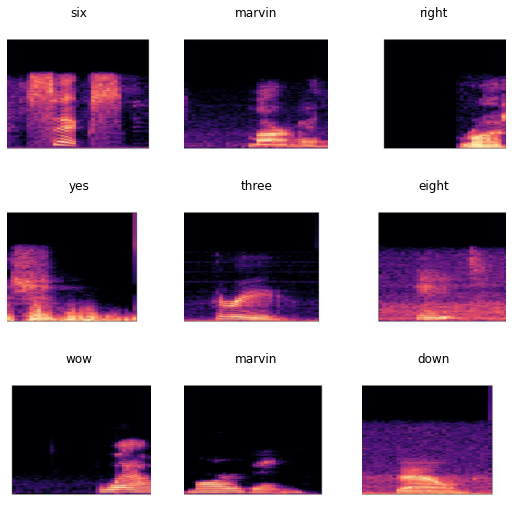

In [ ]:
dls_spec.show_batch()

##Train the Dataset! 
We create our a CNN Learner for our ResNet50 architecture. It should be noted that we are showing the model with the best case accuracy as CUDA would timeout and create problems on running various architectures in the notebook.

In [ ]:
learn_spec = cnn_learner(dls_spec, resnet50, metrics= accuracy)

We obtain the optimal learning rate through `lr_find()`

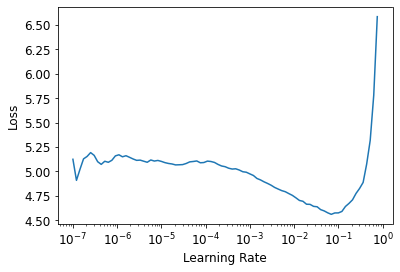

In [ ]:
lr_min, lr_steep = learn_spec.lr_find()

I replot the LR Finder plot to find the steepest slope for maximum optimization. 

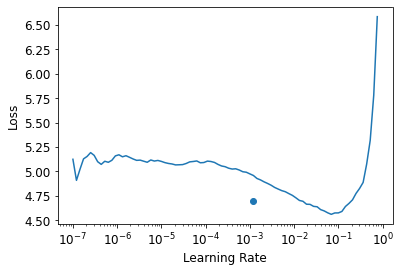

In [ ]:
learn_spec.recorder.plot_lr_find()
plt.scatter(lr_steep, 4.7) 

fine_tune, I tune the pretrained ResNet50 model.

I intially tune the head of the model for 1 epoch.

Post satisfaction with the accuracy, I unfreeze the model and train for 4 epochs till stagnation in accuracy is reached.

In [ ]:
learn_spec.fine_tune(4, base_lr = lr_steep, freeze_epochs=3)  

epoch,train_loss,valid_loss,accuracy,time
0,2.951267,2.157789,0.382024,09:03
1,1.664430,1.195113,0.646808,09:01
2,0.914552,0.626534,0.808032,09:00


epoch,train_loss,valid_loss,accuracy,time
0,0.399109,0.324380,0.902913,11:43
1,0.297939,0.214865,0.937187,11:40
2,0.196188,0.187948,0.948367,11:42
3,0.144011,0.165527,0.952045,11:40


In [ ]:
learn_spec.export()

The accuracy of the model is 95.2% on the spectogram dataset. 

##Make Predicitions

In [ ]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU
spec_inf.dls.to('cuda'); #pushing dataset on GPU 

In [ ]:
preds_spec = spec_inf.get_preds(dl=spec_test_dls) 

In [ ]:
accuracy(preds_spec[0],preds_spec[1]) 

TensorBase(0.9563)

Our model has a test accuracy of 95.63%


##Make Inferences 

In [ ]:
_, preds = torch.max(preds_spec[0], dim = 1) 

In [ ]:
cats = list(dls_spec.vocab)
spec_pred, spec_true = get_cats(cats,preds,preds_spec[1])

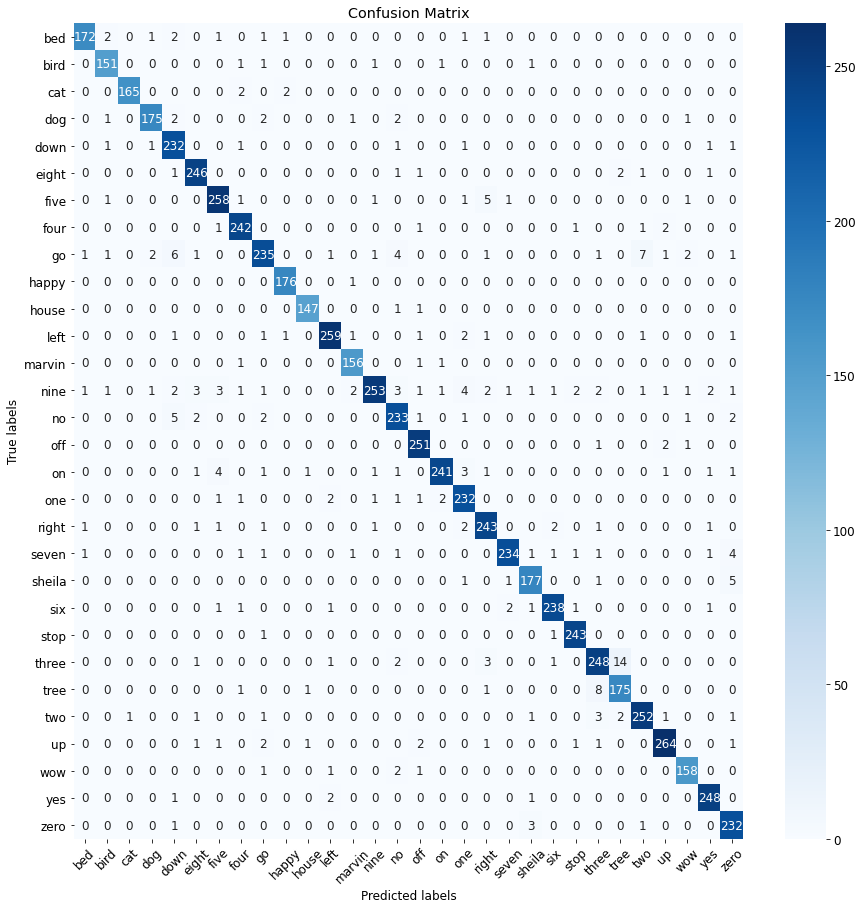

In [ ]:
ConfusionMatrix(dls_spec.vocab, spec_pred, spec_true)

#Mel-Spectogram 


We will first create a classifier to classify mel spectogram images into the correct words. 

In [ ]:
# !unzip /content/gdrive/MyDrive/SpeechRecognition/mel_spectogram.zip 

Let's check if all the training images are here! 

In [ ]:
path = Path('/content/mel_spec/train_images')

cats = os.listdir(path)
sum = 0 
for cat in cats: 
  sum+= len(os.listdir(f'{path}/{cat}'))
sum 

64721

Since, the total number of examples is 64,721 which is equal to the number of files present in the `train_images` directory, we can be assured that we have all the training examples

##Create Image DataBunch 

Using the above functions, I create the DataBunch to pass through the ResNet34 Architecture

In [ ]:
validation = [path/x for x in val]

In [ ]:
mel_spec = DataBlock(blocks = (ImageBlock, CategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split),
          item_tfms=Resize(224))  

In [ ]:
dls_mel = mel_spec.dataloaders(path) 

In [ ]:
test_mel = dls_mel.test_dl([path/t for t in test], with_labels=True) 

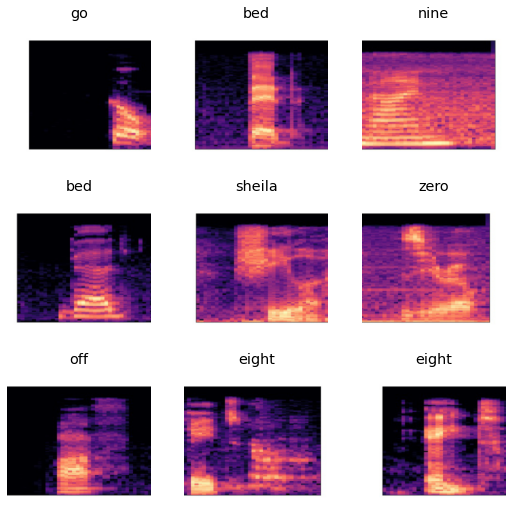

In [ ]:
dls_mel.show_batch() 

##Train the Classifier!

In [ ]:
learn_mel = cnn_learner(dls_mel, resnet50, metrics = accuracy)  

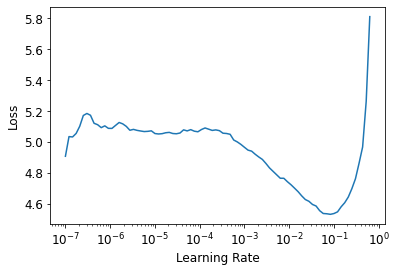

In [ ]:
lr_min, lr_steep = learn_mel.lr_find() 

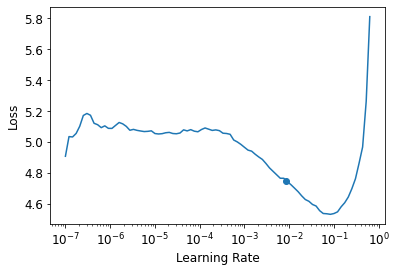

In [ ]:
learn_mel.recorder.plot_lr_find()
plt.scatter(lr_min,4.75) 

In [ ]:
learn_mel.fine_tune(4, base_lr = lr_min, freeze_epochs=3) 

epoch,train_loss,valid_loss,accuracy,time
0,1.549952,1.101529,0.673139,08:50
1,0.628027,0.413640,0.879671,08:56
2,0.415789,0.277072,0.917182,08:55


epoch,train_loss,valid_loss,accuracy,time
0,0.370229,0.316270,0.903501,11:37
1,0.273863,0.214672,0.937482,11:36
2,0.164969,0.141476,0.958076,11:36
3,0.126726,0.126681,0.964401,11:37


The model has an accuracy of 96.4% on validation dataset.

In [ ]:
learn_mel.export() 

##Make Predicitions

In [ ]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU! 

In [ ]:
mel_inf.model = mel_inf.model.cuda()
mel_inf.dls.to('cuda');

Now let's predict!

In [ ]:
preds_mel = mel_inf.get_preds(dl = test_mel)

In [ ]:
accuracy(preds_mel[0], preds_mel[1])

TensorBase(0.9621)

There is a test accuracy of 96.21%

##Make Inferences 

In [ ]:
_, preds = torch.max(preds_mel[0], dim = 1) 

In [ ]:
cats = list(dls_mel.vocab)
pred_mel, true_mel = get_preds(cats,preds,preds_mel[1])

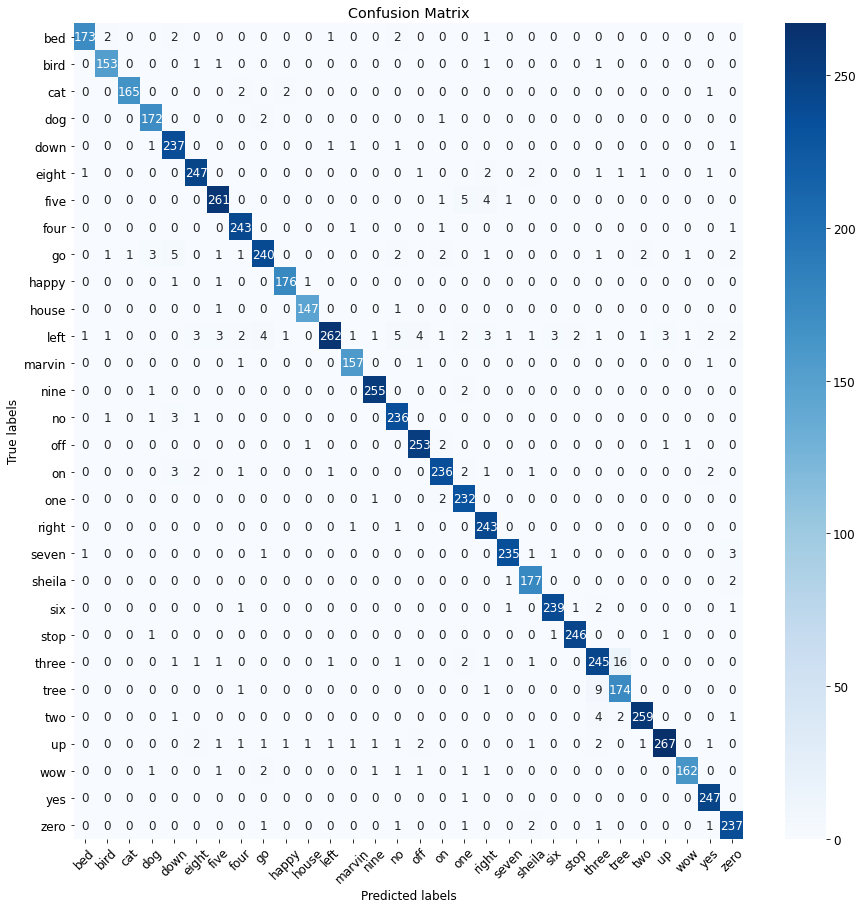

In [ ]:
ConfusionMatrix(cats,pred_mel, true_mel)

#MFCC Spectogram 


We will first create a classifier to classify MFCC spectogram images into the correct words. 

In [ ]:
# !unzip /content/gdrive/MyDrive/SpeechRecognition/mfcc.zip 

Let's check if all the training images are here! 

In [ ]:
path = Path('/content/mfcc/train_images')

cats = os.listdir(path)
sum = 0 
for cat in cats: 
  sum+= len(os.listdir(path/cat))
assert sum == len(files) 

Since, the total number of examples is 64,721 which is equal to the number of files present in the `train_images` directory, we can be assured that we have all the training examples

##Create Image DataBunch 

Using the above functions, I create the DataBunch to pass through the ResNet50 Architecture

In [ ]:
validation = [path/x for x in val]

In [ ]:
mfcc_spec = DataBlock(blocks = (ImageBlock, CategoryBlock),
          get_items = get_image_files,
          get_y = label_func, 
          splitter = FuncSplitter(split),
          item_tfms=Resize(224)) 

In [ ]:
dls_mfcc = mfcc_spec.dataloaders(path) 

In [ ]:
test_mfcc = dls_mfcc.test_dl([path/t for t in test], with_labels=True)

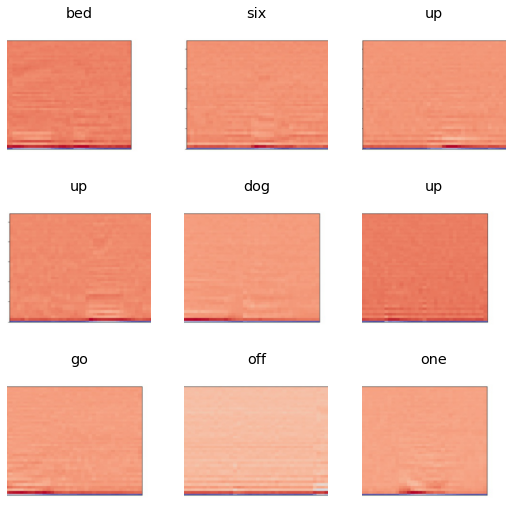

In [ ]:
dls_mfcc.show_batch() 

##Train the Classifier!

In [ ]:
learn_mfcc = cnn_learner(dls_mfcc, resnet50, metrics= accuracy)  

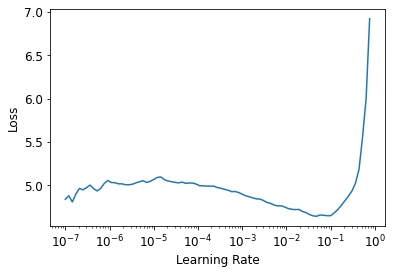

In [ ]:
lr_min, lr_steep = learn_mfcc.lr_find() 

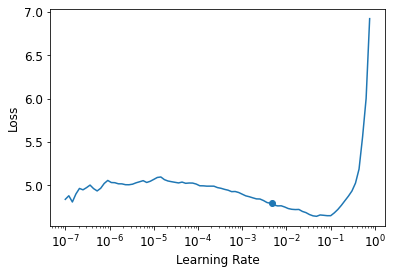

In [ ]:
learn_mfcc.recorder.plot_lr_find()
plt.scatter(lr_min, 4.8)

In [ ]:
learn_mfcc.fine_tune(4, base_lr = lr_min, freeze_epochs=3) 

epoch,train_loss,valid_loss,accuracy,time
0,2.095908,1.572934,0.538541,08:44
1,1.018475,0.730745,0.778464,09:00
2,0.641451,0.458566,0.860253,08:59


epoch,train_loss,valid_loss,accuracy,time
0,0.453386,0.387112,0.882171,11:42
1,0.294816,0.253995,0.922183,11:42
2,0.198395,0.183893,0.946749,11:42
3,0.141749,0.163259,0.952339,11:43


The accuracy on the validation set is 95.23%

In [ ]:
 learn_mfcc.export()

##Make Predicitions on Mini Test Set!

In [ ]:
mfcc_inf = load_learner('/content/mfcc.pkl') 

Putting the model and dataset on the GPU! 

In [ ]:
mfcc_inf.model = mfcc_inf.model.cuda()
mfcc_inf.dls.to('cuda'); 

Now let's predict!

In [ ]:
preds_mfcc = mfcc_inf.get_preds(dl = test_mfcc)

In [ ]:
accuracy(preds_mfcc[0], preds_mfcc[1])

TensorBase(0.9529)

There is a test accuracy of 95.29%

###Make Inferences 

In [ ]:
_, preds = torch.max(preds_mfcc[0], dim = 1) 

In [ ]:
cats = list(dls_mel.vocab)
pred_mfcc, true_mfcc = get_preds(cats, preds,preds_mfcc[1])

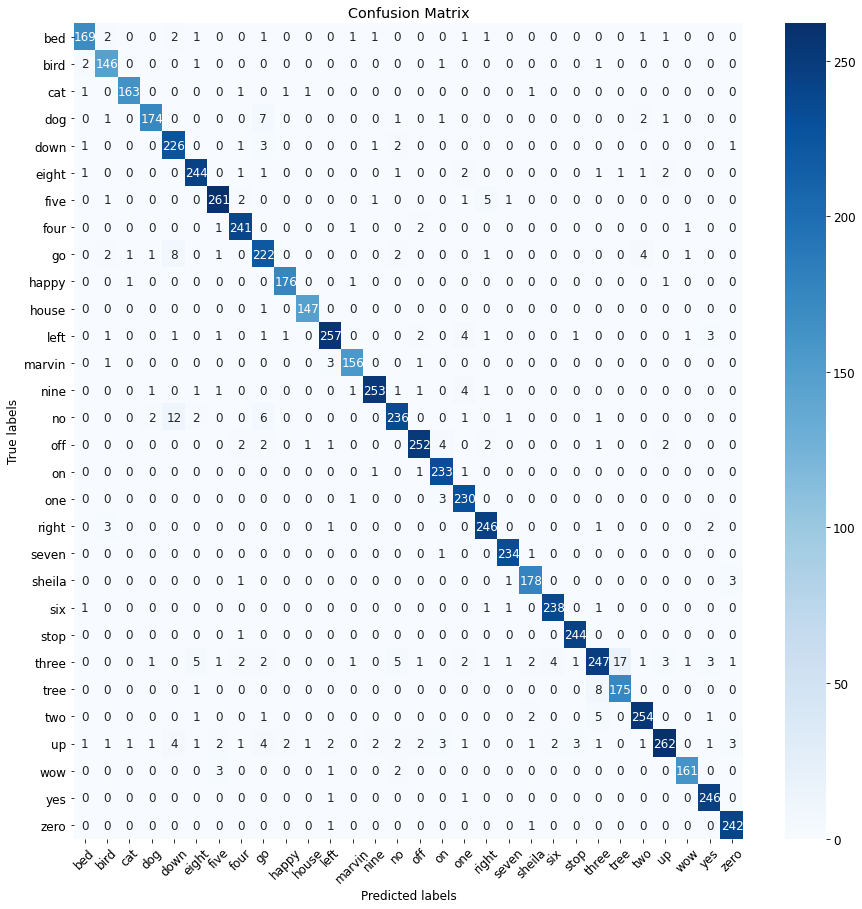

In [ ]:
ConfusionMatrix(cats, pred_mfcc, true_mfcc)

In [ ]:
!rm -r mfcc

#Combining the Predicitions Together

In [ ]:
def acc(pred, true): return np.array([p == t for p, t in zip(pred, true)]).mean()

In [ ]:
def mode(df): return df.mode(axis=1)[0].values

##Combining All
We first combine Mel Spectogram, Spectogram and MFCC together and see if there is an improvement in predicitions. 

In [ ]:
df = pd.DataFrame(list(zip(pred_mel,spec_pred, pred_mfcc)),
                  columns = ['Mel Spectogram','Spectogram', 'MFCC'])

In [ ]:
print(f'The accuracy of the model with all three predictions is {acc(mode(df), true_mel)*100}')

The accuracy of the model with all three predictions is 96.43013899049012


The test accuracy for the model is 96.43%

##Combining Mel and Spectogram
We first combine Mel Spectogram, Spectogram and MFCC together and see if there is an improvement in predicitions. 

In [ ]:
df = pd.DataFrame(list(zip(pred_mel,spec_pred)),
                  columns = ['Mel Spectogram','Spectogram'])

In [ ]:
print(f'The accuracy of the model with all three predictions is {acc(mode(df), true_mel)*100}')

The accuracy of the model with all three predictions is 95.94732991953182


The test accuracy for the model is 95.94%

##Combining Mel and MFCC
We first combine Mel Spectogram, Spectogram and MFCC together and see if there is an improvement in predicitions. 

In [ ]:
df = pd.DataFrame(list(zip(pred_mel,pred_mfcc)),
                  columns = ['Mel Spectogram','MFCC'])

In [ ]:
print(f'The accuracy of the model with all three predictions is {acc(mode(df), true_mel)*100}')

The accuracy of the model with all three predictions is 95.932699341624


The test accuracy for the model is 95.93%

##Combining Spectogram and MFCC
We first combine Spectogram, Spectogram and MFCC together and see if there is an improvement in predicitions. 

In [ ]:
df = pd.DataFrame(list(zip(pred_mel,pred_mfcc)),
                  columns = ['Spectogram','MFCC'])

In [ ]:
print(f'The accuracy of the model with all three predictions is {acc(mode(df), true_mel)*100}')

The accuracy of the model with all three predictions is 95.932699341624


The test accuracy for the model is 95.93%

Hence, the best model comes from combining all three predictions with a test accuracy of 96.4%

#Test Set Predictions

Since, we are satified with the model created, let's get the predictions for all the test images!

In [ ]:
%%bash
unzip /content/gdrive/MyDrive/SpeechRecognition/test_spec.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Spectogram Test Set

Let's begin by getting all the test files. 

In [ ]:
path = Path('/content/test_spec/')

In [ ]:
def get_test_files(path):
  return os.listdir(path)

In [ ]:
test_files = get_test_files(path) 

In [ ]:
len(test_files)

158538

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [ ]:
spec_test_dls = dls_spec.test_dl([path/t for t in test_files]) 

##Make Predicitions

In [ ]:
spec_inf = load_learner('/content/spec.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
spec_inf.model = spec_inf.model.cuda() #pushing model on GPU 
spec_inf.dls.to('cuda'); #pushing dataset on GPU 

In [ ]:
preds_spec = spec_inf.get_preds(dl=spec_test_dls)

In [ ]:
_, spec_preds = torch.max(preds_spec[0], dim = 1) 

In [ ]:
spec_cats = [dls_spec.vocab[p] for p in spec_preds] 

In [ ]:
df = pd.DataFrame(list(zip(test_files, spec_cats))).set_index(0)
df.to_csv('spectogram.csv')

In [ ]:
!rm -r test_spec

##Mel Spectogram Test Set

Unzip the test set for mel spectogram. 

In [ ]:
%%bash 
unzip /content/gdrive/MyDrive/SpeechRecognition/test_mel.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
path = Path('/content/test_mel_spec/')

In [ ]:
test_files = get_test_files(path) 

In [ ]:
len(test_files)

158538

Since, we know there are 158k+ files in the test set, the test files for the spectogram is accurate.

In [ ]:
test_mel = dls_mel.test_dl([path/t for t in test_files]) 

##Make Predicitions

In [ ]:
mel_inf = load_learner('/content/mel.pkl') 

Putting the model and dataset on the GPU to accelerate the time taken to predict.  

In [ ]:
mel_inf.model = mel_inf.model.cuda() #pushing model on GPU 
mel_inf.dls.to('cuda'); #pushing dataset on GPU 

In [ ]:
preds_mel = mel_inf.get_preds(dl=test_mel) 

In [ ]:
_, mel_preds = torch.max(preds_mel[0], dim = 1) 

In [ ]:
mel_cats = [dls_mel.vocab[p] for p in mel_preds] 

In [ ]:
df = pd.DataFrame(list(zip(test_files, mel_cats))).set_index(0)
df.to_csv('mel_spectogram.csv')

#Combine Predictions

In [ ]:
df = pd.read_csv('combined.csv', index_col = 0)

In [ ]:
check = df['label1'] == df['label2']
df.loc[check==False,'label1'] = 'silence'

In [ ]:
df.drop(['label2'], axis = 1, inplace=True)

In [ ]:
df.to_csv('combined.csv')